<a href="https://colab.research.google.com/github/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/blob/main/Lab2_Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

**Aim: To perform data preprocessing on the Chronic Kidney Disease dataset, including dataset inspection, handling missing values, encoding categorical variables, feature–target separation, standardization using StandardScaler, and visualization to understand the effect of feature scaling..**

Section: J2
Name: Tanishq Choudhary
Reg No: 23FE10CSE00664

Import packages and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Parse the dataset. I am parsing from github to ensure globally available

In [4]:
url = "https://raw.githubusercontent.com/Tanishq-Choudhary/Tanishq-Choudhary-23FE10CSE00664-ML-Lab-Sem-6/main/data/chronic_kidney_disease_full.csv"
df = pd.read_csv(url)

df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Basic dataset inspection

In [5]:
df.shape

(400, 25)

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   'age'    391 non-null    float64
 1   'bp'     388 non-null    float64
 2   'sg'     353 non-null    float64
 3   'al'     354 non-null    float64
 4   'su'     351 non-null    float64
 5   'rbc'    248 non-null    object 
 6   'pc'     335 non-null    object 
 7   'pcc'    396 non-null    object 
 8   'ba'     396 non-null    object 
 9   'bgr'    356 non-null    float64
 10  'bu'     381 non-null    float64
 11  'sc'     383 non-null    float64
 12  'sod'    313 non-null    float64
 13  'pot'    312 non-null    float64
 14  'hemo'   348 non-null    float64
 15  'pcv'    330 non-null    object 
 16  'wbcc'   295 non-null    object 
 17  'rbcc'   270 non-null    object 
 18  'htn'    398 non-null    object 
 19  'dm'     397 non-null    object 
 20  'cad'    398 non-null    object 
 21  'appet'  399 non

,'age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


shape gives number of rows & columns

info() gives data types + missing values

describe() gives statistical summary

Check for duplicates

In [7]:
df.nunique()

,0
'age',76
'bp',10
'sg',5
'al',6
'su',6
'rbc',2
'pc',2
'pcc',2
'ba',2
'bgr',146


Sanitize names to ensure no errors later.

In [11]:
df.columns = (
    df.columns
      .str.strip()     # remove spaces
      .str.strip("'")  # remove single quotes
      .str.lower()
)


Check for Missing Values

In [12]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


This dataset has missing values, in real datasets we handle them using mean/median/mode or dropping rows.

Now we first separate numeric and categorical columns.

In [13]:
numeric_cols = [
    'age','bp','sg','al','su','bgr','bu','sc','sod','pot',
    'hemo','pcv','wbcc','rbcc'
]

categorical_cols = [
    'rbc','pc','pcc','ba','htn','dm','cad',
    'appet','pe','ane'
]

target = 'class'


Convert numeric columns.

In [14]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Handle missing values.

In [17]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [18]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Handle categorical values.

In [24]:
for col in categorical_cols + [target]:
    df[col] = df[col].astype(str).str.strip().str.lower()

Feature target separation.

In [25]:
X = df.drop(columns=[target])
y = df[target]

Standardization on the dataset to get mean = 0, std = 1. It is needed because features have different scales. This improves model performance

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

Visualizing

Before scaling

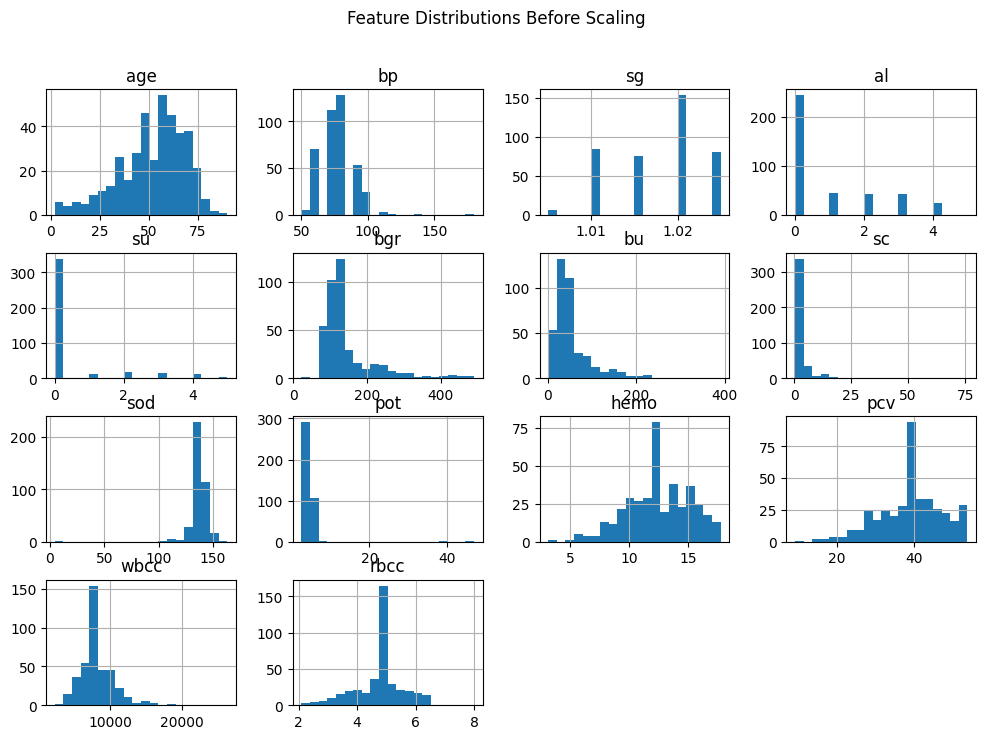

In [27]:
X[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions Before Scaling")
plt.show()


After scaling

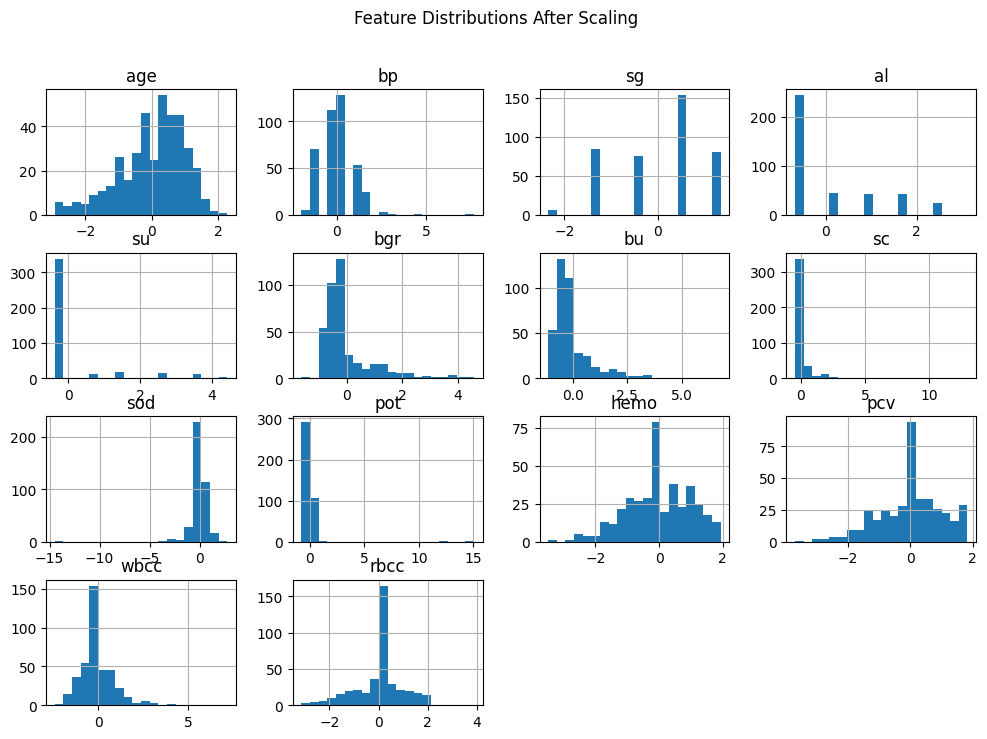

In [28]:
X_scaled[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions After Scaling")
plt.show()


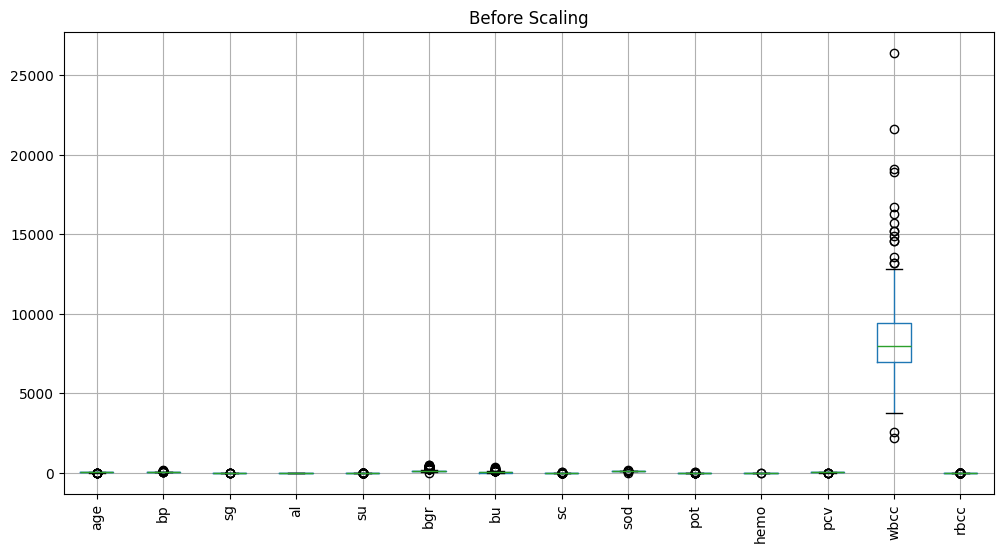

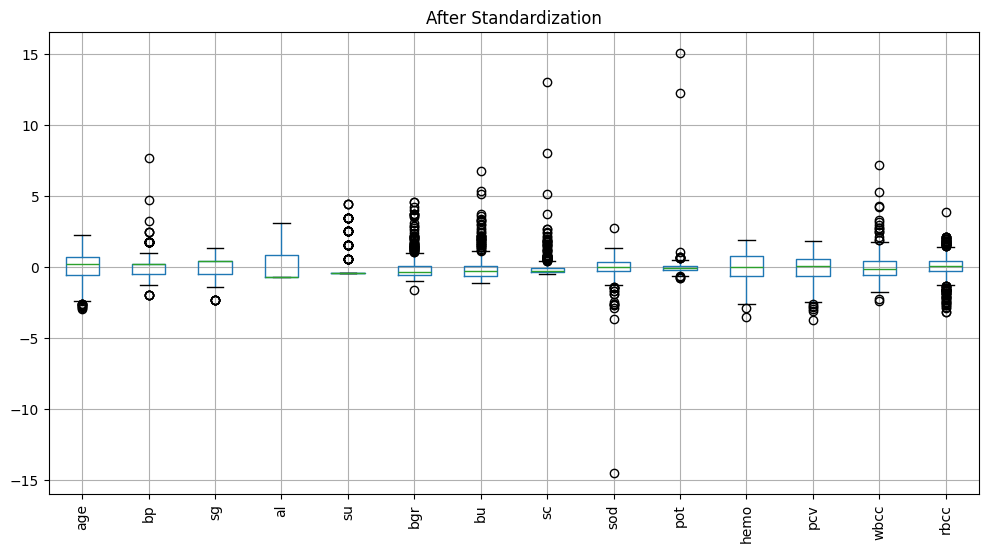

In [30]:
plt.figure(figsize=(12, 6))
X[numeric_cols].boxplot(rot=90)
plt.title("Before Scaling")
plt.show()

plt.figure(figsize=(12, 6))
X_scaled[numeric_cols].boxplot(rot=90)
plt.title("After Standardization")
plt.show()


Final test: Lab 1 heatmap fail without preprocessing, try now.

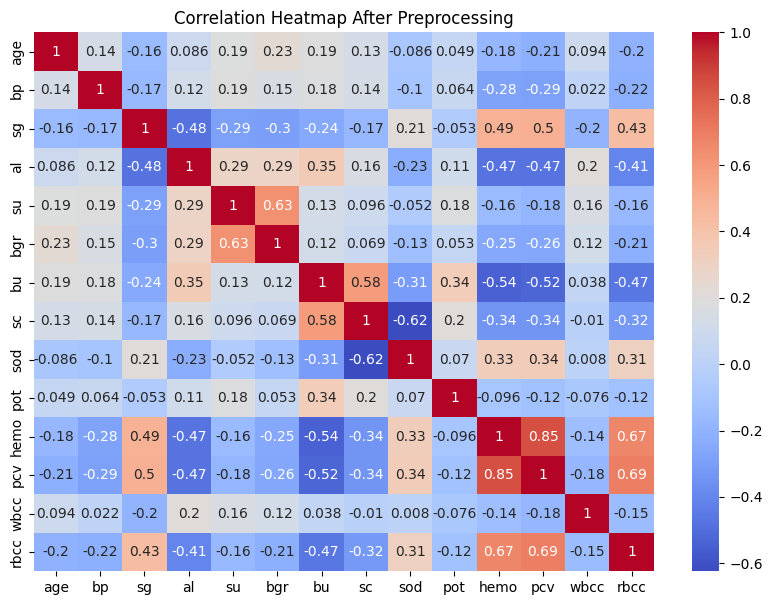

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(X_scaled[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap After Preprocessing")
plt.show()


Scatter plot :

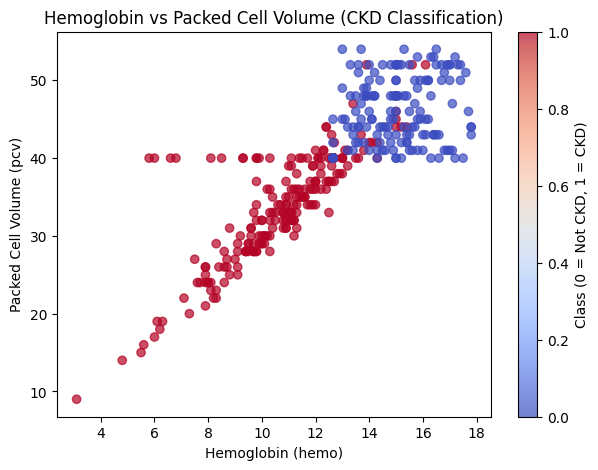

In [36]:
# Select only required columns and drop NaNs
plot_df = df[['hemo', 'pcv', 'class']].dropna()

plt.figure(figsize=(7,5))

plt.scatter(
    plot_df['hemo'],
    plot_df['pcv'],
    c=plot_df['class'].values,
    cmap='coolwarm',
    alpha=0.7
)

plt.xlabel("Hemoglobin (hemo)")
plt.ylabel("Packed Cell Volume (pcv)")
plt.title("Hemoglobin vs Packed Cell Volume (CKD Classification)")
plt.colorbar(label="Class (0 = Not CKD, 1 = CKD)")
plt.show()


#Class task: Features engineering based on **Analytics Vidhya** website shared

In [32]:
df['bun_creatinine_ratio'] = df['bu'] / df['sc']

Handle infinities.

In [33]:
df['bun_creatinine_ratio'] = df['bun_creatinine_ratio'].replace(
    [np.inf, -np.inf], np.nan
)

df['bun_creatinine_ratio'] = df['bun_creatinine_ratio'].fillna(
    df['bun_creatinine_ratio'].median()
)

Scatter plot: Serum Creatinine vs Blood Urea

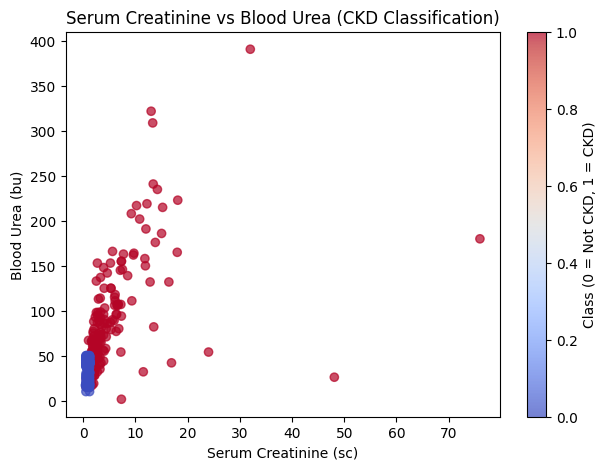

In [35]:
df['class'] = df['class'].astype(float)
df = df.dropna(subset=['class'])
plt.figure(figsize=(7,5))

plt.scatter(
    df['sc'],
    df['bu'],
    c=df['class'].values,   # <- important
    cmap='coolwarm',
    alpha=0.7
)

plt.xlabel("Serum Creatinine (sc)")
plt.ylabel("Blood Urea (bu)")
plt.title("Serum Creatinine vs Blood Urea (CKD Classification)")
plt.colorbar(label="Class (0 = Not CKD, 1 = CKD)")
plt.show()


**Conclusion: In this experiment, the Chronic Kidney Disease dataset was preprocessed by inspecting the data, handling missing values using median and mode, encoding categorical variables, and standardizing numerical features using StandardScaler. Visualizations before and after scaling demonstrated the importance of feature scaling for machine learning models. This preprocessing ensures that the dataset is clean, consistent, and suitable for further model training and evaluation.**